# Digital Audio and Fourier Analysis Tutorial
Technical background notes for the USF MSAN 630 final project.

Jason Helgren, 12 February 2016

**Requirements for this notebook:**
 - the Kaggle audio file "train6.aiff" must be in the same directory as this notebook.



One of the first steps in the winning submission for the completed Kaggle Competition The Marinexplore and Cornell University Whale Detection Challenge is to import digital audio files and calculate spectrograms. This tutorial is intended to explain some of the theory behind digital audio and spectrograms.

An audio recording is a continous signal that measures pressure differences. The frequency and amplitude of the signal determine how we perceive the sound. Digital audio samples the continuous waveform at a specified interval. Compact disks sample at 44.1 kHz, meaning there are 44,100 samples taken each second. Digital audio is often represented in two ways. In the first, the waveform is plotted versus time. The second representation is a spectrogram, which plots the frequency of the waveform versus time. Spectrograms are calculated using discrete Fourier transforms, which rely on the fact that any period signal can be can be represented as a sum of sinusoids.

The most simple audio signal is a pure sinusoid. The Middle C is located in approximately the center of a piano keyboard and has a frequency of 261.6 Hz.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from matplotlib import mlab
import pylab as pl

import aifc

In [2]:
def generate_tone(duration, frequency, sampling_rate):
    """ Simulate a digitally recorded pure tone. """
    t = np.linspace(0, duration, duration * sampling_rate)
    waveform = np.sin(2 * frequency * np.pi * t)
    return waveform

Simulate and plot a digitally recorded middle C with 44.1 kHz sampling rate.

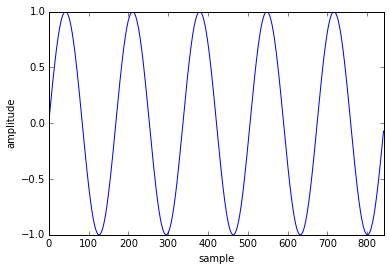

In [5]:
f = 261.6 # set the frequency
d = 2 # simulate a two second audio clip
s = 44100 # 44.1 kHz sampling frequency

middle_c = generate_tone(d, f, s)
# plot a small subset of the tone so we can visualize the waveform
five_cycles = int(s * 5 * 1 / f)
plt.plot(middle_c[0:five_cycles])
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.axis('tight')
plt.show()

Compute a discrete fast fourier transform (FFT) to show the frequency content of the signal. As expected, the plot shows that the signal has a single frequency component at approximately 260 Hz.

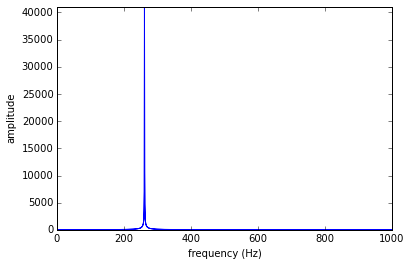

In [6]:
middle_c_fft = abs(np.fft.fft(middle_c))
freqs = np.fft.fftfreq(len(middle_c_fft))
freqs_hz = abs(freqs * s)
# limit the results to frequencies less than 1000 Hz for easier visualization.
limit1000 = freqs_hz < 1000

plt.plot(freqs_hz[limit1000], middle_c_fft[limit1000])
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.axis('tight')
plt.show()

A spectrogram represents changes in the frequency spectrum of the signal with time. The horizontal axis of the spectrogram represents time and shows the same duration as the input signal. The vertical axis shows frequency. The signal in the middle C example doesn't vary with time, thus the spectrogram shows a horizontal line at approximately 260 Hz.

In [7]:
params = {'NFFT':1024, 'Fs':s, 'noverlap':0}
P, freqs, bins = mlab.specgram(middle_c, **params)

In [8]:
def PlotSpecgram(P, freqs, bins):
    """Spectrogram"""
    Z = np.flipud(P) # flip rows so that top goes to bottom, bottom to top, etc.
    xextent = 0, np.amax(bins)
    xmin, xmax = xextent
    extent = xmin, xmax, freqs[0], freqs[-1]

    im = pl.imshow(Z, extent=extent)
    pl.axis('auto')
    pl.xlim([0.0, bins[-1]])
    pl.ylim([0, 1000])

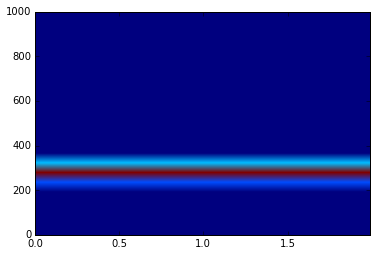

In [38]:
PlotSpecgram(P, freqs, bins)

More complex signals yield more complex and interesting spectrograms. A signal consisting of two superimposed sinusoids will have a spectrogram with two horizontal bands corresponding to the frequency of each sinusoid.

In contrast to the examples so far, the frequency characteristics of typical audio signals vary with time. The audio files in the Kaggle data set record whale calls and significant background noise. The audio files are encoded in AIFF format. The Python standard library includes a module to read AIFF encoded files.

AIFF files record digital samples in a "frame". Each frame contains a sample from the analog signal from each channel. The whales recordings are monophonic, therefore each frame contains a single channel. The sampling frequency is 2000 Hz, and each file includes 4000 samples, thus the duration of each file recording is 2 seconds.

In [10]:
whale_sample_file = 'train6.aiff'
whale_aiff = aifc.open(whale_sample_file,'r')
print "Channels:", whale_aiff.getnchannels() 
print "Frames:", whale_aiff.getnframes() 
print "Frame rate (frames per second):", whale_aiff.getframerate()

Channels: 1
Frames: 4000
Frame rate (frames per second): 2000


To analyze one of the whale recordings, we convert the AIFF data to a Numpy array and generate a spectrogram.

In [12]:
whale_strSig = whale_aiff.readframes(whale_aiff.getnframes())
whale_array = np.fromstring(whale_strSig, np.short).byteswap()
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(whale_array, **params)
PlotSpecgram(P, freqs, bins)

AttributeError: 'module' object has no attribute 'imshow'

The whale call starts about 0.5 seconds, lasts for about one second, and sweeps from 200 Hz to 400 Hz.